# Make Big Titles for main parts of this notebook : 
Create dataframes from source data
    Hopkins
    Italy
    Etc..
Plot source data
Calculate descriptive dataframes
    early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe
    early1k_countries = Earliest 1000 cases (country_name,date,number)
    early_highrate = Earliest highest rate (what date was the highest rate for each country) 
    etc...
Plot descriptive data

# Create DFD a DataFrame of deceased from Hopkins data

In [1]:
# -*- coding: utf-8 -*-
"""
Plot rates of changes per day and per country froo the COVID epidemic
Created on Thu Apr 23 00:03:57 2020
@author: pmannoni
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfd=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnames= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfd.columns= colnames # Set new column names to df dataframe
dfd=dfd.drop(dfd.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfd.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfd

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-02,72,31,459,44,2,3,237,33,3,42,...,0,3,0,0,0,0,1,2,0,2
2020-05-03,85,31,463,45,2,3,246,35,3,42,...,0,3,0,0,0,0,1,2,0,2
2020-05-04,90,31,465,45,2,3,260,39,3,43,...,0,3,0,0,0,0,3,2,0,3
2020-05-05,95,31,470,46,2,3,264,40,3,44,...,0,3,0,0,0,0,3,4,0,5


# Create DFC a DataFrame of confirmed from Hopkins data

In [2]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnames= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnames # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfc

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-02,2469,789,4295,747,35,25,4681,2273,106,3035,...,6,38,13,1,45,6,16,10,3,76
2020-05-03,2704,795,4474,748,35,25,4783,2386,106,3033,...,6,39,13,1,46,6,16,10,3,128
2020-05-04,2894,803,4648,750,35,25,4887,2507,107,3035,...,6,41,13,1,46,6,23,12,3,230
2020-05-05,3224,820,4838,751,36,25,5020,2619,107,3042,...,6,41,13,1,52,6,174,22,3,293


# Create DFR a DataFrame of recovered from Hopkins data

In [3]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfr=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnames= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfr.columns= colnames # Set new column names to df dataframe
dfr=dfr.drop(dfr.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfr.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfr

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-02,331,519,1872,472,11,15,1320,1010,103,2306,...,0,9,13,0,0,5,4,1,0,0
2020-05-03,345,531,1936,493,11,15,1354,1035,103,2328,...,0,9,13,0,0,5,4,1,0,0
2020-05-04,397,543,1998,499,11,15,1442,1071,103,2349,...,0,9,13,0,0,5,4,1,0,0
2020-05-05,421,570,2067,514,11,16,1472,1111,103,2418,...,0,9,13,0,0,5,4,1,0,0


# create IDFD,IDFC,IDFR from Italian government regional file

# Get cases per country

In [4]:
dfd['France'].loc[dfd.index = '1000']  

SyntaxError: invalid syntax (<ipython-input-4-b55691d3413b>, line 1)

In [ ]:
mcountries=['France','Italy','Spain','Portugal','Germany','United Kingdom','Tanzania','Sweden','Poland','Brazil','South Africa'] #,'US']
colnames

   # Plot dfd of selected countries

In [27]:
#  plot selected column with specific names of countries 
dfd[mcountries].plot()

NameError: name 'mcountries' is not defined

# Plot dfc of selected countries

In [28]:
#  plot selected column with specific names of countries 
dfc[mcountries].plot()

NameError: name 'mcountries' is not defined

# Plot dfr of selected countries

In [29]:
#  plot selected column with specific names of countries 
dfr[mcountries].plot()

NameError: name 'mcountries' is not defined

# Create dfd and dfc with rates (rates must be calculated with non cumulative data)

In [30]:
#dfdr=dfd.pct_change(periods=1)
##dfdr
#dfdr[mcountries].plot(legend=True,figsize=(20,10) )


In [31]:
#dfrr=dfr.pct_change(periods=1)
##dfdr
#dfrr[mcountries].plot(legend=True,figsize=(20,10) )

In [32]:
#dfcr=dfc.pct_change(periods=1)
##dfdr
#dfcr[mcountries].plot(legend=True,figsize=(20,10) )

In [33]:
#dfd['US'].loc[dfd.index > '2020-03-20']  
#dfdr['US'].loc[dfdr.index > '2020-03-20']  
#dfdr['France'].loc[dfdr.index > '2020-02-28']


In [34]:
#for c in colnames:
   # print(c,dfd[c][dfd[c]!=0].index[0],dfd[c][dfd[c]!=0].iloc[0])

# Load file with confinement dates for each country

# Plot evolution with a line and circles where confinement ( conf) started


In [35]:
#Confinements dates & the date for the first confirmed case
df2=pd.read_csv('confinement_date.csv') # Dataframe of confinement
df2


,Unnamed: 0,France,Italy,Spain,Germany,Portugal,United Kingdom
0,First confirmed case,2020-01-24,2020-01-30,2020-01-02,2020-01-27,2020-03-02,2020-01-29
1,Begining first confinement,2020-03-17,2020-03-09,2020-03-15,2020-03-22,2020-03-19,2020-03-23
2,End of first confinement,2020-05-11,2020-05-04,2020-05-02,2020-05-04,2020-05-03,2020-05-29


In [36]:
#dfr=dfr.drop(dfr.index[[0,1,2,3]]) 
df2 = df2.drop(df2.columns[[0]], axis=1)# remove the first first  column
df2

,France,Italy,Spain,Germany,Portugal,United Kingdom
0,2020-01-24,2020-01-30,2020-01-02,2020-01-27,2020-03-02,2020-01-29
1,2020-03-17,2020-03-09,2020-03-15,2020-03-22,2020-03-19,2020-03-23
2,2020-05-11,2020-05-04,2020-05-02,2020-05-04,2020-05-03,2020-05-29


In [37]:
col = dfc.columns

In [38]:
dfc['France'].loc[dfc.index == '2020-01-24']

2020-01-24    2
Name: France, dtype: object

In [39]:
#countries = ['France','Italy','Spain','Germany','Portugal','United Kingdom']
#countries
#conf[countries].plot()


# Non cummulative data i.e. Daily data: prepared from cummulative data

In [40]:
## Reverse cumulative
#data=[[1,3,5], [4,10,10], [8,20,15] ]
  
## Create the pandas DataFrame 
#source = pd.DataFrame(data, columns = ['France', 'Italy','Spain'])
#source

## Create non cumuilative dataframe
#output =

In [41]:
#source.loc[::-1, 'France'].cumsum()[::-1]

In [42]:
#source.groupby(level=0).diff().fillna(source).reset_index()

In [43]:
#source.diff()

In [44]:
#dfd
#colnames

In [45]:
selcountries = ['France', 'Italy','Spain', 'Germany', 'Portugal', 'United Kingdom']

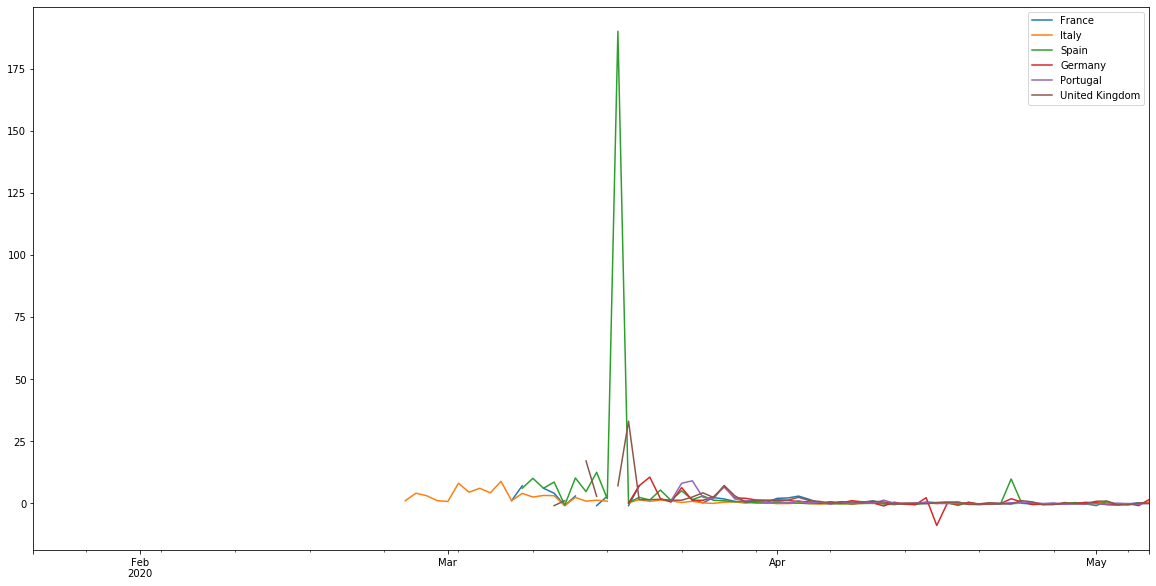

In [46]:
DFd = dfd.diff()
dfd_r=DFd.pct_change(periods=5)
dfd_r[selcountries].plot(legend=True,figsize=(20,10) )

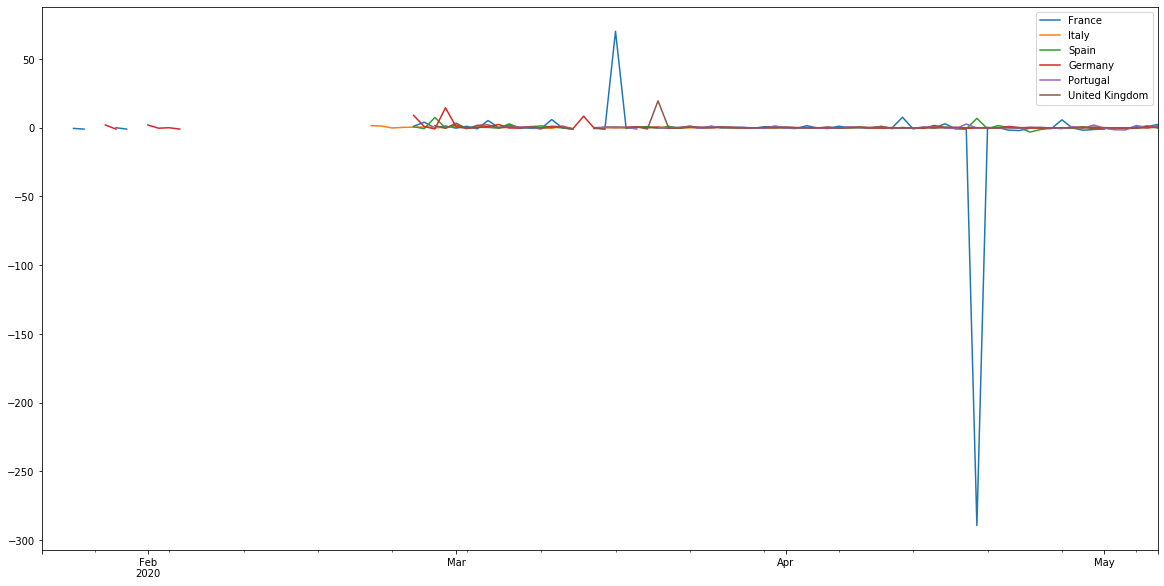

In [47]:
DFc = dfc.diff()
dfc_r=DFc.pct_change(periods=1)
dfc_r[selcountries].plot(legend=True,figsize=(20,10) )

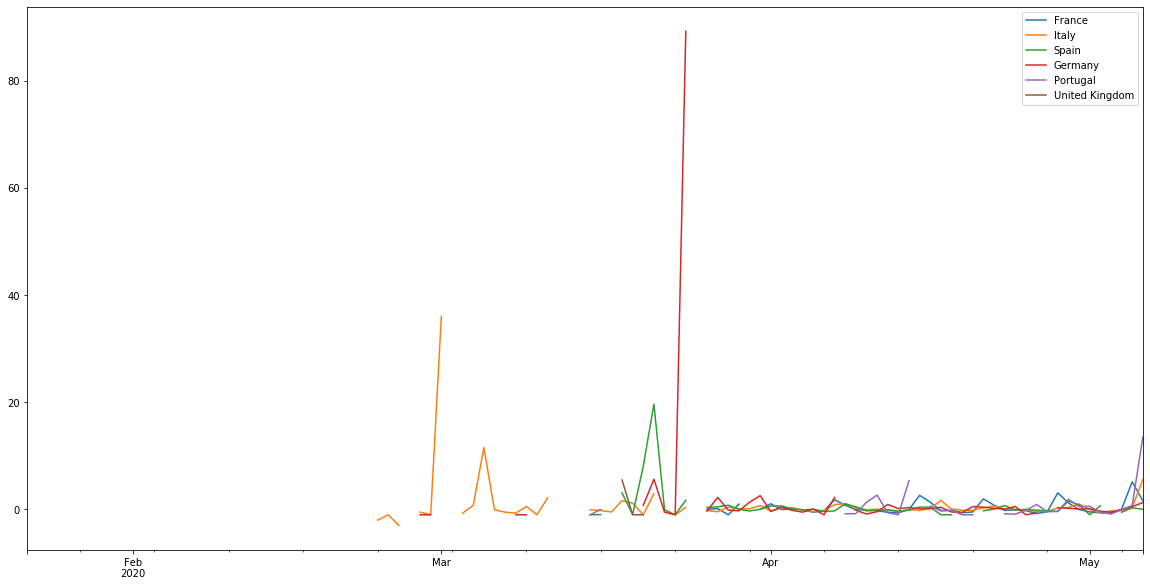

In [48]:
DFr = dfr.diff()
dfr_r=DFr.pct_change(periods=2)
dfr_r[selcountries].plot(legend=True,figsize=(20,10) )

# Make code to sort countries (top 20) by 
Earliest epidemic start : 
Earliest rate down
Earliest highest rate
Earliest diminishing rate
Strongest diminishiong rates
Richest 
poorest
number of inhabitants

# Create lists of countries (dfd,dfc,dfr):
early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

early1k_countries = Earliest 1000 cases (country_name,date,number)

early_highrate = Earliest highest rate (what date was the highest rate for each country) 



# Create
dataframe where index is number of days since 100th case for all countries 

In [49]:
#dfc
#dfc[dfc["date"] > 50]
dfc['colnames'].loc[dfc.index > '1000']

KeyError: 'colnames'

# early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

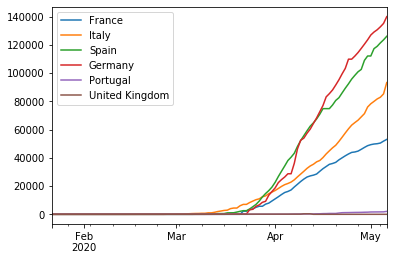

In [50]:

selcountries = ['France', 'Italy','Spain', 'Germany', 'Portugal', 'United Kingdom']
dfr[selcountries].plot()